In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlalchemy as sqla

## Data analyst in US vs Canada from linkedin

#### US and Canada are two of the leading economies in the world, thus their job markets are largely representative of most countries. By comparing the details of the data analyst positions offered in the US and Canada, we can figure out if the demands for this job in different countries are similar. The goal of this project is to scrape job postings and related information about "Data Analyst" position in "US" and "Canada" from Linkedin.

### Data Scrab

In [ ]:
%run "linkedin.py"

#### The data of "Data analyst" we get come from Linkedin. We restrict our locations from "US" and "Canada".<br>The actual data positions are much larger than the data that we scraped. Since the largest number of pages we can get is 40 from Linkedin, so the data set is smaller than we expected. The analyse we have on the following is based on the maximum data we can scrape, so the result may not be generalized to other platforms. 

### Compare geographical distribution of jobs

In [4]:
uscsv = pd.read_csv("us.csv")
cancsv = pd.read_csv("canada.csv")
us_locnona = uscsv[uscsv['Location'].notna()]    #filter out data with NaN Location
can_locnona = cancsv[cancsv['Location'].notna()]
loccount_us = us_locnona['Location'].value_counts()
loccount_can = can_locnona['Location'].value_counts()
locname_us = list(loccount_us.keys())
locname_can = list(loccount_can.keys())
def mergeloc(locname, count):         #merge the count value for the same state
    statecount = {}
    for i in range(len(locname)):
        name = locname[i].split(',')[0]
        if name == "United States" or name == "Canada":
            continue
        if name not in statecount.keys():
            statecount[name] = count[i]
        else:
            statecount[name] += count[i]
    return statecount
us_namecount = mergeloc(locname_us, loccount_us)
can_namecount = mergeloc(locname_can, loccount_can)
x_us = list(us_namecount.keys())[0:10]      #Name of the top 10 locations in which jobs are located
x_can = list(can_namecount.keys())[0:10]
y_us = list(us_namecount.values())[0:10]    #number of counts of the top 10 locations
y_can = list(can_namecount.values())[0:10]


(None, None)

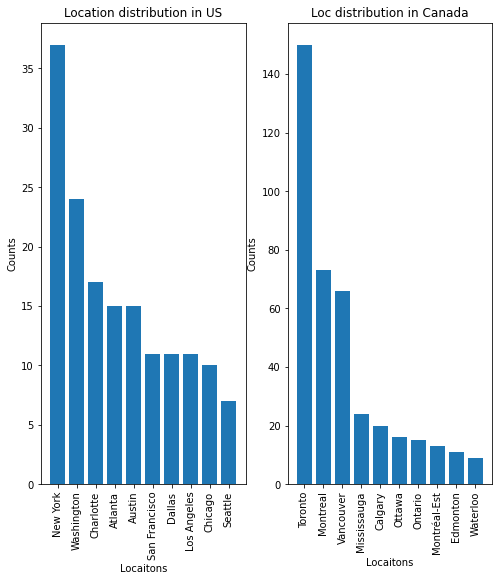

In [90]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(7,7))
fig.tight_layout()
axs1.bar(x_us, y_us), axs2.bar(x_can, y_can)
axs1.set_title('Location distribution in US'), axs2.set_title('Loc distribution in Canada')
axs1.set(xlabel = 'Locaitons', ylabel = 'Counts'), axs2.set(xlabel = 'Locaitons', ylabel = 'Counts')
axs1.tick_params(axis = 'x', rotation = 90), axs2.tick_params(axis = 'x', rotation = 90)


#### Here we compare the geographical distributions of the job posted. Not surprisingly, we see that most data analyst jobs are in New York and Washington in US. Toronto is the location in Canada where has the highest demand. The common points of these locations are big city and good ecnomic. For students who are finding a job of data analyst, it is better to go to New York, Washington, or Toronto, since these places have more chances.

### Compare industries

In [137]:
us_indusnona = uscsv['Industry'].dropna()   #filter out data with NaN Industry
can_indusnona = cancsv['Industry'].dropna()
industry = ["Computer", "Information Technology","Marketing", "Bank"]
us_IT = us_indusnona.str.contains("Computer|Information Technology|Internet",regex = True).sum()
us_IT_per = us_IT/len(us_indusnona)   #percentage of jobs in IT sector, us
can_IT = can_indusnona.str.contains("Computer|Information Technology|Internet",regex = True).sum()
can_IT_per = can_IT/len(can_indusnona)    #percentage of jobs in IT sector, canada

us_fi = us_indusnona.str.contains("Financial",regex = True).sum()
us_fi_per = us_fi/len(us_indusnona)   #percentage of jobs in IT sector, us
can_fi = can_indusnona.str.contains("Financial",regex = True).sum()
can_fi_per = can_fi/len(can_indusnona)    #percentage of jobs in financial sector, canada

us_other = len(us_indusnona)-us_indusnona.str.contains("Computer|Information Technology|Internet|Financial",regex = True).sum()
us_other_per = us_other/len(us_indusnona)   #percentage of jobs not in IT or financial sector, us

can_other = len(can_indusnona)-can_indusnona.str.contains("Computer|Information Technology|Internet|Financial",regex = True).sum()
can_other_per = can_other/len(can_indusnona)   #percentage of jobs not in IT or financial sector, canada

us_ind = [us_IT_per, us_fi_per, us_other_per]
can_ind = [can_IT_per, can_fi_per, can_other_per]


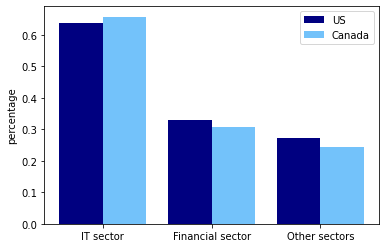

In [140]:
fig1, ax1 = plt.subplots()
x_labels = ["IT sector", "Financial sector", "Other sectors"]
width = 0.4
ax1.bar(np.arange(3), us_ind, width, color='#000080', label='US')
ax1.bar(np.arange(3)+width, can_ind, width, color='#73C2FA', label='Canada')
ax1.set_ylabel('percentage')
ax1.set_xticks(np.arange(3)+width / 2)
ax1.set_xticklabels(x_labels)
ax1.legend()


#### During the data scraping, we realized that IT and Financial sector are two industies that closely related to the job posting. In order to better visualize and confirm our hypothesis, we focus on IT and Financial. The plot shows that the industries that required data analyst in US and Canada are quite similar. IT covers over 60 percent data analyst in both countries. Financial sector covers around 30 percent of jobs. Due to the high similarity of the industy trend, we believe that for developed countries, IT and Financial sectors are the two industries that students can look for when applying the job.  

### Compare seniority level

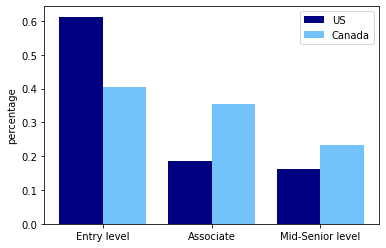

In [13]:
us_slnona = uscsv[uscsv['Seniority Level'].notna()]    #filter out data with NaN Seniority Level
can_slnona = cancsv[cancsv['Seniority Level'].notna()]
width = 0.4
def seniority(dataset):
    assonum = 0
    entrynum = 0
    mid_seniornum = 0
    for level in dataset['Seniority Level']:    #Find the number of jobs with each Seniority Level
        if level == "Associate":
            assonum += 1
        elif level == "Entry level":
            entrynum += 1
        elif level == "Mid-Senior level":
            mid_seniornum += 1
    return [entrynum, assonum, mid_seniornum]

levels_us = [num/len(us_slnona["Seniority Level"]) for num in seniority(us_slnona)]
levels_can = [num/len(can_slnona["Seniority Level"]) for num in seniority(can_slnona)]
fig2, ax = plt.subplots()
x_labels = ["Entry level", "Associate", "Mid-Senior level"]
ax.bar(np.arange(3), levels_us, width, color='#000080', label='US')
ax.bar(np.arange(3)+width, levels_can, width, color='#73C2FA', label='Canada')
ax.set_ylabel('percentage')
ax.set_xticks(np.arange(3)+width / 2)
ax.set_xticklabels(x_labels)
ax.legend()


#### Here, we visualize the percentage of seniority level of data analyst in US and Canada. There isn't an restrict description about how much working experiences needed for each seniority level. However, from the information we get from the internet, the Entry level is around 0-3 years, associate level is around 2-5 years, and mid-senior level is the range arount 5-15 years. We can see that the job posted on Linkedin are more open to people who do not have too much working experience. Especially in US, the requirement of entry level data analyst is over 60 percent. In Canada, the difference isn't obvious. Therefore, we think the good news is that for US students who want to work as a data analyst, it will be easier to find a work than in Canada. However, since seniority level is directly correlate with salary, the potential of data analyst in Canada is immeasurable.

### Preferred degree

In [7]:
us_des = uscsv['Description']
us_des = us_des.dropna()

In [8]:
can_des = cancsv['Description']
can_des = can_des.dropna()

In [9]:
us_under = us_des.str.contains('Bachelor|undergraduate|bachelor|Undergraduate|B.A.|B.S.',regex=True) 
us_under_per = us_under.sum() / us_des.count()
us_under_per

0.5649171270718232

In [10]:
us_grad = us_des.str.contains('Graduate|master|phd|graduate|Master|PHD|M.S.|M.A.',regex=True)
us_grad_per = us_grad.sum() / us_des.count()
us_grad_per

0.34668508287292815

In [11]:
non_us = 1-us_under_per - us_grad_per

In [12]:
can_under = can_des.str.contains('Bachelor|undergraduate|bachelor|Undergraduate|B.A.|B.S.',regex=True)
can_under_per = can_under.sum() / can_des.count()
can_under_per

0.3644067796610169

In [13]:
can_grad = can_des.str.contains('Graduate|master|phd|graduate|Master|PHD|M.S.|M.A.',regex=True)
can_grad_per = can_grad.sum() / can_des.count()
can_grad_per

0.3177966101694915

In [14]:
non_can = 1-can_under_per - can_grad_per

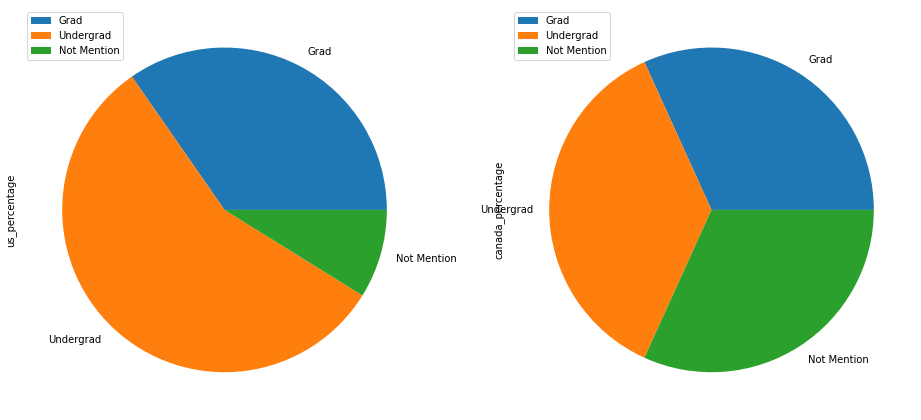

In [15]:
pie = pd.DataFrame({'us_percentage': [us_grad_per,us_under_per,non_us],
                   'canada_percentage': [can_grad_per,can_under_per,non_can]},
                  index=['Grad', 'Undergrad','Not Mention'])
plot = pie.plot.pie(subplots=True, figsize=(16,10))

#### Surprisingly, we see that data analyst in US mostly are just required to have a Bachelor degree. Fewer of the postions require graduate degree. It is interesting to see that in Canada, the difference isn't obvious. The requirement between graduate degree and undergraduate degree is almost same. It is also interesting to see that there are some positions that haven't mentioned about required degree.

### Job type and preferred degree

In [93]:
#us full-time data
us_full_data = uscsv[uscsv['Employment Type']=='Full-time']['Description'].dropna()
us_full_under = us_full_data.str.contains('Bachelor|undergraduate|bachelor|Undergraduate|B.A.|B.S.',regex=True)
us_full_under_per = us_full_under.sum() / us_full_data.count()

us_full_grad = us_full_data.str.contains('Graduate|master|phd|graduate|Master|PHD|M.S.|M.A.',regex=True)
us_full_grad_per = us_full_grad.sum() / us_full_data.count()

us_full_nm = 1-us_full_under_per - us_full_grad_per

#us part-time data
us_part_data = uscsv[uscsv['Employment Type']=='Part-time']['Description'].dropna()
us_part_under = us_part_data.str.contains('Bachelor|undergraduate|bachelor|Undergraduate|B.A.|B.S.',regex=True)
us_part_under_per = us_part_under.sum() / us_part_data.count()

us_part_grad = us_part_data.str.contains('Graduate|master|phd|graduate|Master|PHD|M.S.|M.A.',regex=True)
us_part_grad_per = us_part_grad.sum() / us_part_data.count()

us_part_nm = 1-us_part_under_per - us_part_grad_per


In [96]:
#canada full-time data
can_full_data = cancsv[cancsv['Employment Type']=='Full-time']['Description'].dropna()
can_full_under = can_full_data.str.contains('Bachelor|undergraduate|bachelor|Undergraduate|B.A.|B.S.',regex=True)
can_full_under_per = can_full_under.sum() / can_full_data.count()

can_full_grad = can_full_data.str.contains('Graduate|master|phd|graduate|Master|PHD|M.S.|M.A.',regex=True)
can_full_grad_per = can_full_grad.sum() / can_full_data.count()

can_full_nm = 1-can_full_under_per - can_full_grad_per


#canada part-time data
can_part_data = cancsv[cancsv['Employment Type']=='Part-time']['Description'].dropna()
can_part_data
#In the canada csv file, no job is labelled as part-time, so ignore this part

Series([], Name: Description, dtype: object)

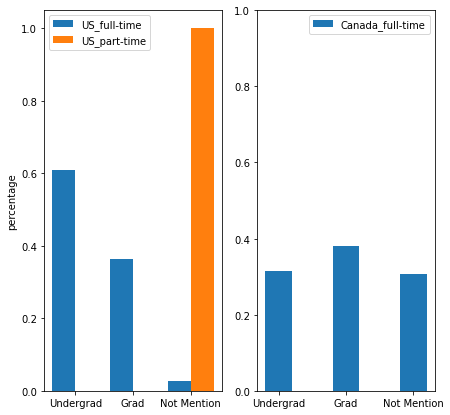

In [120]:
us_full_value = [us_full_under_per, us_full_grad_per, us_full_nm]
us_part_value = [us_part_under_per, us_part_grad_per, us_part_nm]
fig4, (ax4,ax5) = plt.subplots(1,2,figsize=(7,7))
x_labels = ["Undergrad", "Grad", "Not Mention"]
width = 0.4
ax4.bar(np.arange(3), us_full_value, width, label='US_full-time')
ax4.bar(np.arange(3)+width, us_part_value, width, label='US_part-time')
ax4.set_ylabel('percentage')
ax4.set_xticks(np.arange(3) + width / 2)
ax4.set_xticklabels(x_labels)
ax4.legend()
ax5.bar(x_labels, can_full_value, width = width, label='Canada_full-time')
ax5.set_ylim([0, 1])
ax5.legend()


#### Here we focus on job type and we combine the degree preference and job type to see if there are any association. The plot shows that in US,  the part-time job of data analyst do not have a clear degree preference, which makes sense. Most full-time jobs in US just require undergraduate degree; whereas the full-time jobs in Canada require more graduate degree than undergraduate degree. Another interesting thing we see is that from our data, we haven't find the part-time job of data analyst in Canada. Therefore, if students want to find a part-time job that relates to data analyst in Canada, Linkedin may not be a good choice.

### Perferred skills

In [16]:
us_py = us_des.str.contains('python|Python',regex=True)
us_py = us_py.sum()

In [17]:
us_sql = us_des.str.contains('SQL|sql',regex=True)
us_sql = us_sql.sum()

In [18]:
us_java = us_des.str.contains('Java|java',regex=True)
us_java = us_java.sum()

In [24]:
us_d3 = us_des.str.contains('d3|D3',regex=True)
us_d3 = us_d3.sum()

In [146]:
can_py = can_des.str.contains('python|Python',regex=True)
can_py = can_py.sum()
can_sql = can_des.str.contains('SQL|sql',regex=True)
can_sql = can_sql.sum()
can_java = can_des.str.contains('Java|java',regex=True)
can_java = can_java.sum()
can_d3 = can_des.str.contains('d3|D3',regex=True)
can_d3 = can_d3.sum()

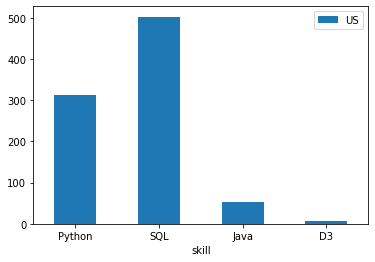

In [156]:
us_skill = pd.DataFrame({'skill':['Python', 'SQL', 'Java','D3'], 'US':[us_py, us_sql, us_java, us_d3]})
us_skill_plot = us_skill.plot.bar(x='skill', y='US', rot=0)

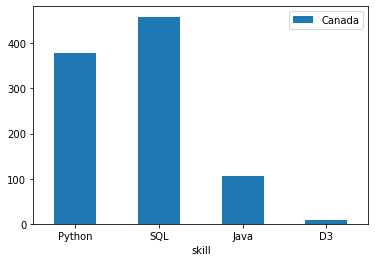

In [157]:
can_skill = pd.DataFrame({'skill':['Python', 'SQL', 'Java','D3'], 'Canada':[can_py, can_sql, can_java, can_d3]})
can_skill_plot = can_skill.plot.bar(x='skill', y='Canada', rot=0)

#### Actually there are more than these skills mentioned in the job requirement. However, we choose to analyze these four skills mainly because we are more familiar with them and we learned from STA141b class. From both US and Canada data, we can see that the trends are similar. SQL is the most mentioned required skill, and python followed by it. Python and SQL have very high frequency so we think STA141b class will be very useful in the future. Learn python and SQL carefully can be a strong point for your future job application.

### Wrap up

#### We have a lot of interesting findings in this project and many of them confirmed our expectations to data analyst. For example, New York and Toronto are two cities that have the higest demand for data analyst. It is also surprised to see that data analyst in Canada prefer graduade degree, whereas data analyst in US prefer undergraduate degree. We also feel excited when we see that the skill requirement for data analyst is highly correlated with STA1141b class, which includes Python and SQL.
#### We hope you enjoyed reading our project and find something interesting. If you can find something useful, we will be very glad to hear that! Thanks for your reading!